## Fintech Churn Analysis

#### In this project, I conducted a comprehensive churn analysis using a synthetic financial dataset of 10,000 clients. The goal was to simulate the challenges faced by fintech platforms like Mercado Pago in understanding and anticipating customer attrition, especially in digital banking and payment environments.

###### Disclaimer: All the information analyzed is mock public data and does not represent customer data of any fintech

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Carga de datos

In [45]:
# Cargar el archivo CSV
df = pd.read_csv("Bank-Records.csv")

# Mostrar las primeras filas para confirmar la carga
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Calculo de tasa de churn

/tmp/ipykernel_9435/2715026603.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Exited', palette=custom_palette)


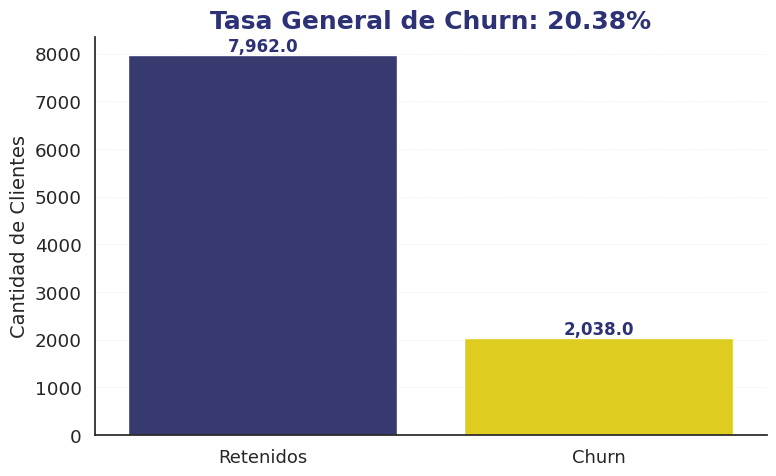

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="white", font="DejaVu Sans", font_scale=1.2)

# Colores personalizados
custom_palette = ['#2D3277', '#FFE600']  # Retenidos, Churn

# Calcular la tasa general de churn
churn_rate = df['Exited'].mean()

# Crear figura
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Exited', palette=custom_palette)

# Títulos y etiquetas
plt.title(f"Tasa General de Churn: {churn_rate:.2%}", fontsize=18, fontweight='bold', color='#2D3277')
plt.xticks([0, 1], ['Retenidos', 'Churn'], fontsize=13)
plt.xlabel('', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=14)

# Etiquetas sobre las barras
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:,}',                 # separador de miles
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                color='#2D3277')

# Estética pro
sns.despine()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:
print(f"🔍 Tasa general de churn: {churn_rate:.2%}")

🔍 Tasa general de churn: 20.38%


## Churn Por Género

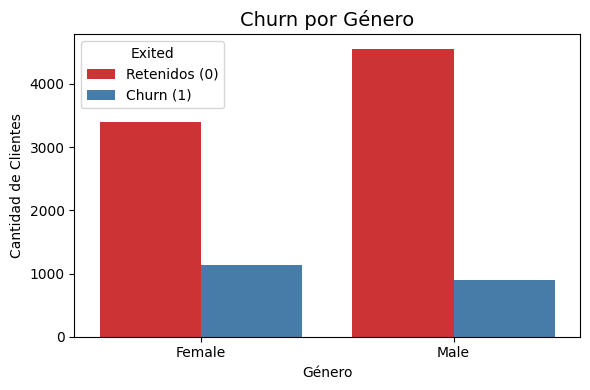

In [18]:
# Gráfico de churn por género
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Exited', palette='Set1')
plt.title('Churn por Género', fontsize=14)
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Género')
plt.legend(title='Exited', labels=['Retenidos (0)', 'Churn (1)'])
plt.tight_layout()
plt.show()

# Calcular tasa de churn por género
churn_by_gender = df.groupby('Gender')['Exited'].mean().reset_index()
churn_by_gender.columns = ['Género', 'Tasa de Churn']


In [19]:
print("🔍 Tasa de churn por género:")
display(churn_by_gender)

🔍 Tasa de churn por género:


,Género,Tasa de Churn
0,Female,0.250715
1,Male,0.164743


## Churn por grupo etario

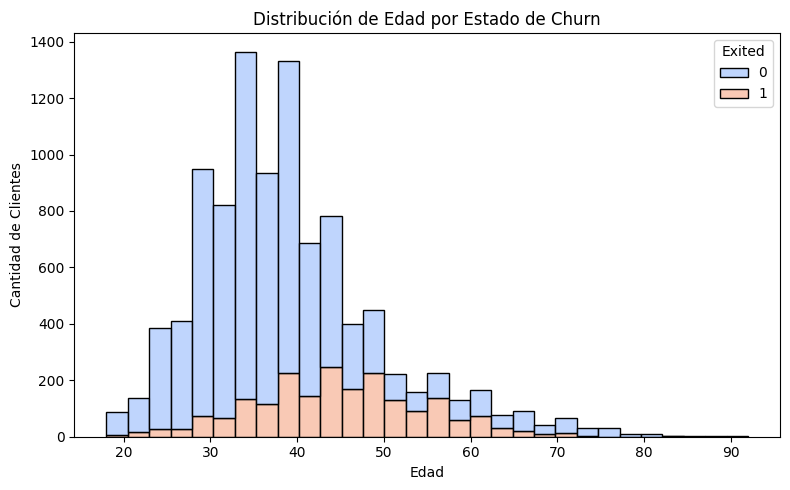

🔍 Tasa de churn por grupo etario:


/tmp/ipykernel_9435/3704619119.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_agegroup = df.groupby('AgeGroup')['Exited'].mean().reset_index()


,Grupo Etario,Tasa de Churn
0,18-30,0.075203
1,31-40,0.121096
2,41-50,0.339655
3,51-60,0.562108
4,61+,0.247845


In [22]:

# Histograma apilado de edad vs churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30, palette='coolwarm')
plt.title('Distribución de Edad por Estado de Churn')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

# Crear grupos etarios
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 30, 40, 50, 60, 100], 
                        labels=['18-30', '31-40', '41-50', '51-60', '61+'])

# Tasa de churn por grupo de edad
churn_by_agegroup = df.groupby('AgeGroup')['Exited'].mean().reset_index()
churn_by_agegroup.columns = ['Grupo Etario', 'Tasa de Churn']

# Mostrar tabla
print("🔍 Tasa de churn por grupo etario:")
display(churn_by_agegroup)

## Churn basado en saldo

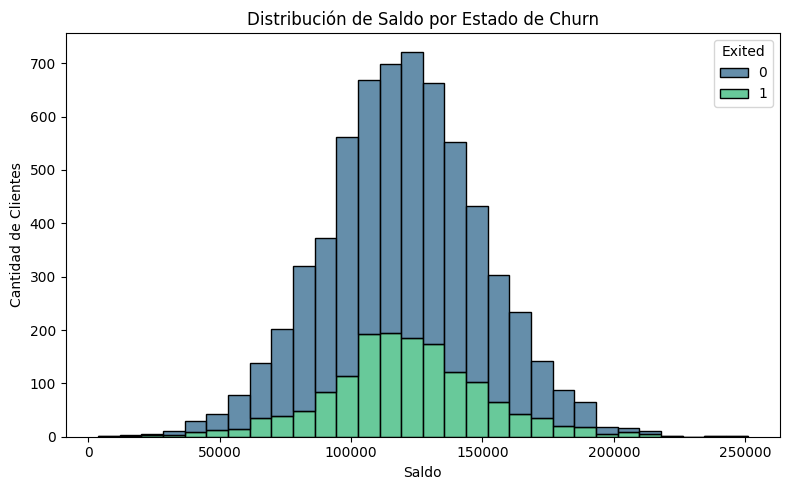

🔍 Tasa de churn por grupo de saldo:


/tmp/ipykernel_9435/3367027216.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_balance = df.groupby('BalanceGroup')['Exited'].mean().reset_index()


,Grupo de Saldo,Tasa de Churn
0,0,0.138236
1,1–50K,0.346667
2,50–100K,0.199470
3,100–150K,0.257702
4,150–200K,0.219251
5,200K+,0.558824


In [24]:
# Visualización del balance vs churn (solo balances positivos)
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['Balance'] > 0], x='Balance', hue='Exited', multiple='stack', bins=30, palette='viridis')
plt.title('Distribución de Saldo por Estado de Churn')
plt.xlabel('Saldo')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

df['BalanceGroup'] = pd.cut(df['Balance'], bins=[-1, 0, 50000, 100000, 150000, 200000, float('inf')],
                            labels=['0', '1–50K', '50–100K', '100–150K', '150–200K', '200K+'])

churn_by_balance = df.groupby('BalanceGroup')['Exited'].mean().reset_index()
churn_by_balance.columns = ['Grupo de Saldo', 'Tasa de Churn']

print("🔍 Tasa de churn por grupo de saldo:")
display(churn_by_balance)


## Churn basado en numero de productos

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


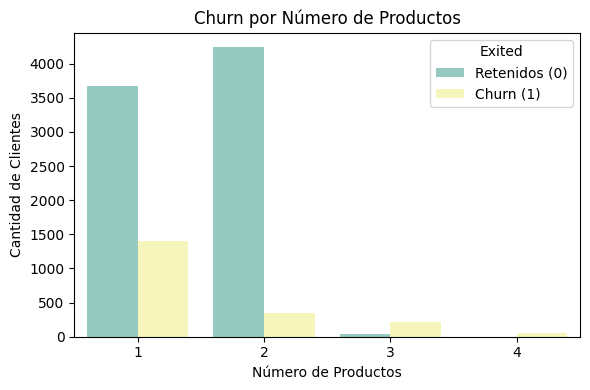

🔍 Tasa de churn por número de productos:


,Número de Productos,Tasa de Churn
0,1,0.277144
1,2,0.076035
2,3,0.827068
3,4,1.000000


In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette='Set3')
plt.title('Churn por Número de Productos')
plt.xlabel('Número de Productos')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Exited', labels=['Retenidos (0)', 'Churn (1)'])
plt.tight_layout()
plt.show()

# Tasa de churn por cantidad de productos
churn_by_products = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
churn_by_products.columns = ['Número de Productos', 'Tasa de Churn']

# Mostrar tabla
print("🔍 Tasa de churn por número de productos:")
display(churn_by_products)


## Churn basado en satisfaccion del cliente

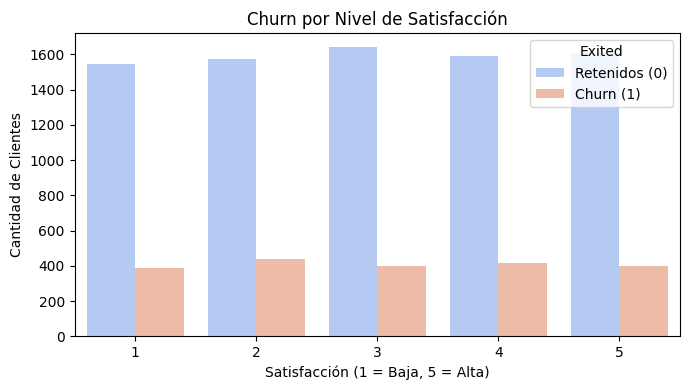

🔍 Tasa de churn por nivel de satisfacción:


,Nivel de Satisfacción,Tasa de Churn
0,1,0.200311
1,2,0.217974
2,3,0.196376
3,4,0.206175
4,5,0.198104


In [30]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Satisfaction Score', hue='Exited', palette='coolwarm')
plt.title('Churn por Nivel de Satisfacción')
plt.xlabel('Satisfacción (1 = Baja, 5 = Alta)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Exited', labels=['Retenidos (0)', 'Churn (1)'])
plt.tight_layout()
plt.show()

# Tasa de churn por satisfacción
churn_by_satisfaction = df.groupby('Satisfaction Score')['Exited'].mean().reset_index()
churn_by_satisfaction.columns = ['Nivel de Satisfacción', 'Tasa de Churn']

# Mostrar tabla
print("🔍 Tasa de churn por nivel de satisfacción:")
display(churn_by_satisfaction)


## Churn basado en quejas

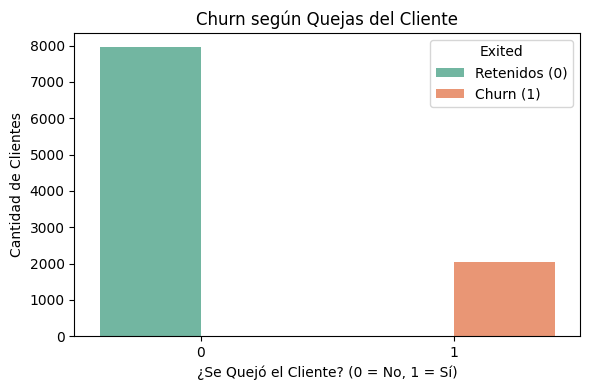

🔍 Tasa de churn según quejas del cliente:


,Se Quejó,Tasa de Churn
0,0,0.000503
1,1,0.995108


In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Complain', hue='Exited', palette='Set2')
plt.title('Churn según Quejas del Cliente')
plt.xlabel('¿Se Quejó el Cliente? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Exited', labels=['Retenidos (0)', 'Churn (1)'])
plt.tight_layout()
plt.show()

# Tasa de churn según quejas
churn_by_complain = df.groupby('Complain')['Exited'].mean().reset_index()
churn_by_complain.columns = ['Se Quejó', 'Tasa de Churn']

# Mostrar tabla
print("🔍 Tasa de churn según quejas del cliente:")
display(churn_by_complain)


## DASHBOARD

/tmp/ipykernel_9435/264684463.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='Set2', ax=axs[0, 0])
/tmp/ipykernel_9435/264684463.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(['Retenidos (0)', 'Churn (1)'])
/tmp/ipykernel_9435/264684463.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.97])
/home/ignaciogomenuka/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


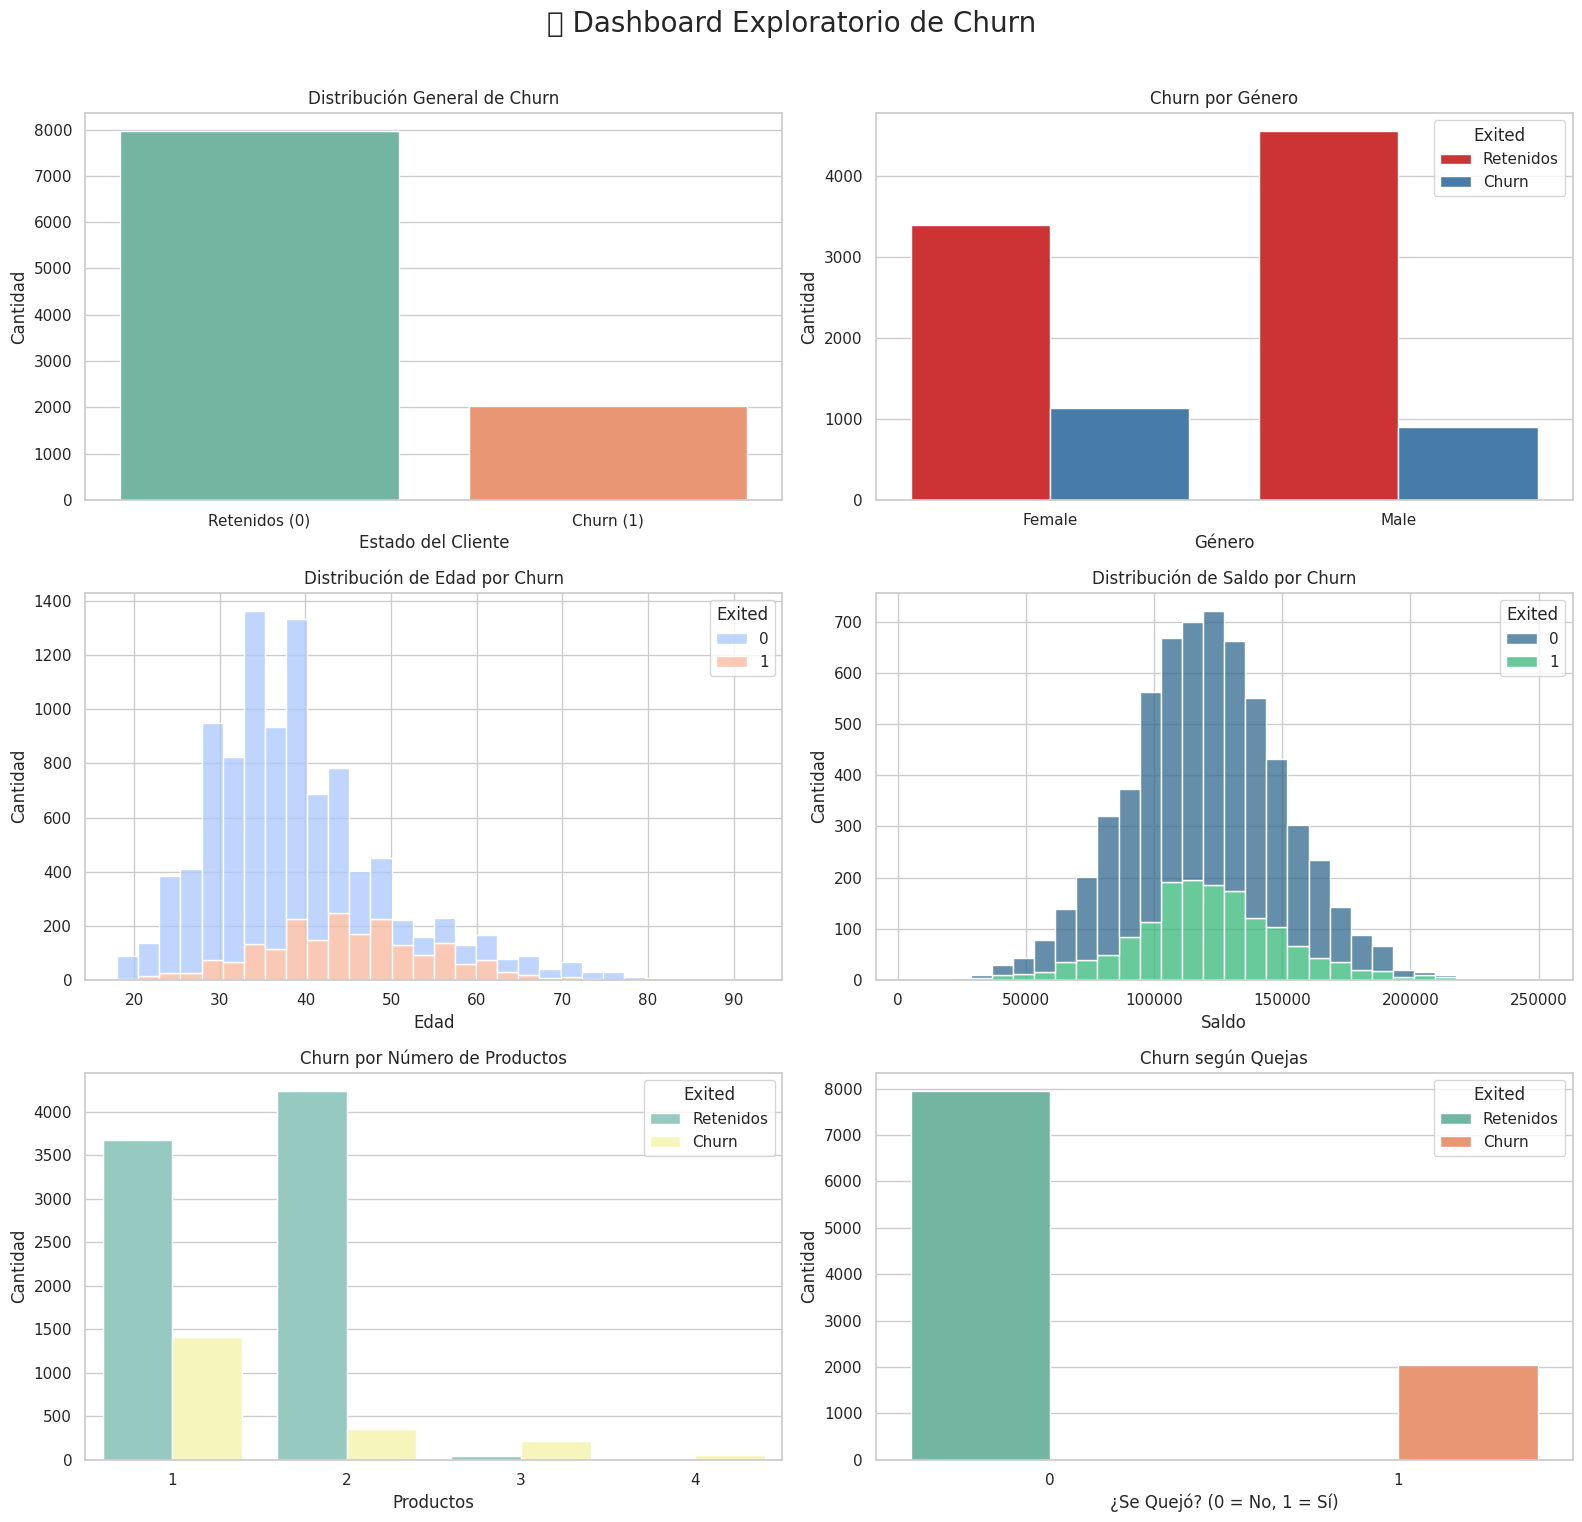

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")

# Crear figura y ejes
fig, axs = plt.subplots(3, 2, figsize=(16, 16))

# Gráfico 1: Churn general
sns.countplot(data=df, x='Exited', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Distribución General de Churn')
axs[0, 0].set_xticklabels(['Retenidos (0)', 'Churn (1)'])
axs[0, 0].set_xlabel('Estado del Cliente')
axs[0, 0].set_ylabel('Cantidad')

# Gráfico 2: Churn por género
sns.countplot(data=df, x='Gender', hue='Exited', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Churn por Género')
axs[0, 1].set_xlabel('Género')
axs[0, 1].set_ylabel('Cantidad')
axs[0, 1].legend(title='Exited', labels=['Retenidos', 'Churn'])

# Gráfico 3: Edad vs churn
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30, palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Edad por Churn')
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Cantidad')

# Gráfico 4: Balance vs churn
sns.histplot(data=df[df['Balance'] > 0], x='Balance', hue='Exited', multiple='stack', bins=30, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Saldo por Churn')
axs[1, 1].set_xlabel('Saldo')
axs[1, 1].set_ylabel('Cantidad')

# Gráfico 5: Productos vs churn
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette='Set3', ax=axs[2, 0])
axs[2, 0].set_title('Churn por Número de Productos')
axs[2, 0].set_xlabel('Productos')
axs[2, 0].set_ylabel('Cantidad')
axs[2, 0].legend(title='Exited', labels=['Retenidos', 'Churn'])

# Gráfico 6: Quejas vs churn
sns.countplot(data=df, x='Complain', hue='Exited', palette='Set2', ax=axs[2, 1])
axs[2, 1].set_title('Churn según Quejas')
axs[2, 1].set_xlabel('¿Se Quejó? (0 = No, 1 = Sí)')
axs[2, 1].set_ylabel('Cantidad')
axs[2, 1].legend(title='Exited', labels=['Retenidos', 'Churn'])

# Título general y ajuste
plt.suptitle('📊 Dashboard Exploratorio de Churn', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


## Predictive Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_model = df.copy()


df_model = df_model.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'AgeGroup', 'BalanceGroup'], errors='ignore')

df_model = pd.get_dummies(df_model, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

# 3. Separar variables predictoras (X) y target (y)
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

# 4. División en entrenamiento y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("X_train:", X_train_scaled.shape)
print("X_test :", X_test_scaled.shape)


X_train: (8000, 17)
X_test : (2000, 17)


🌲 Resultados del Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



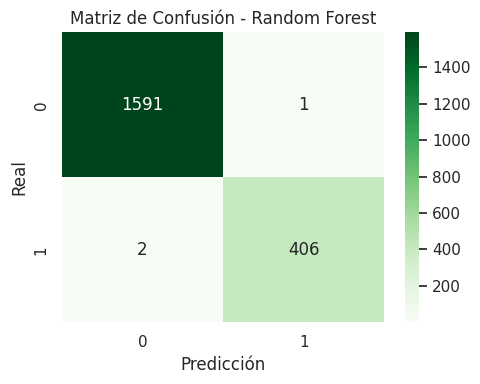

/tmp/ipykernel_9435/3681201088.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importancia', y='Feature', palette='viridis')


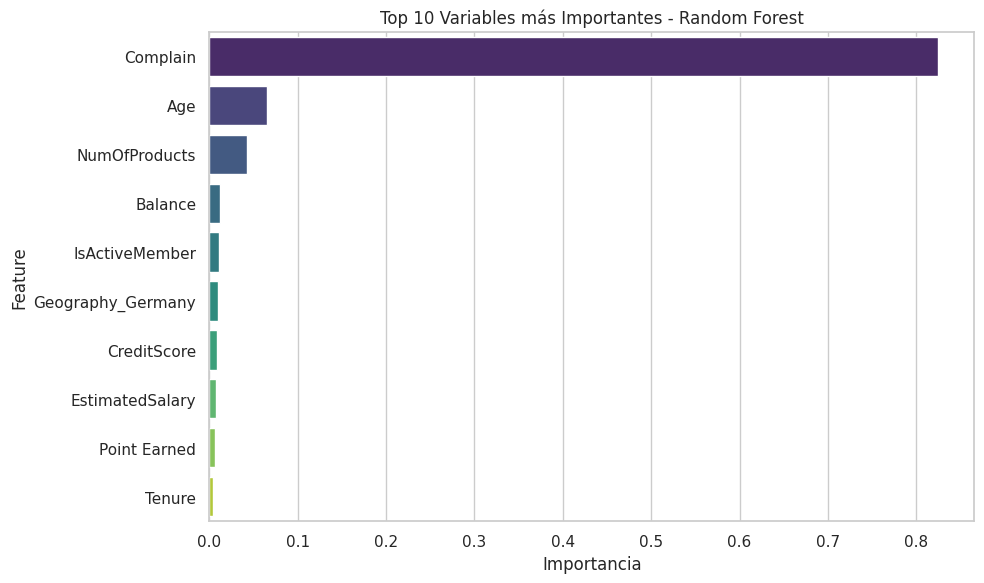

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Entrenar modelo
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluación
print("🌲 Resultados del Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Importancia de variables
importances = model_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Gráfico de importancia
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importancia', y='Feature', palette='viridis')
plt.title("Top 10 Variables más Importantes - Random Forest")
plt.tight_layout()
plt.show()
